Variant #2

t = 100, ∆t = 10,
n1 = 150, n2 = 100, n3 = 50, n4 = 200, n5 = 100,
n6 = 100, n7 = 80, n8 = 20, n9 = 90, n10 = 10

N = n1 + n2 + . . . + n10

Failure-free operation probability P(t)

Вероятность безотказной работы P(t)

'Общее число абонентов: 700'

Временный интервалы (t),Кол-во потерь (n),P(t)
0,0,1.000000
1,500,0.285714
2,100,0.142857
3,50,0.071429
4,20,0.042857
5,10,0.028571
6,1,0.027143
7,8,0.015714
8,2,0.012857
9,9,0.000000


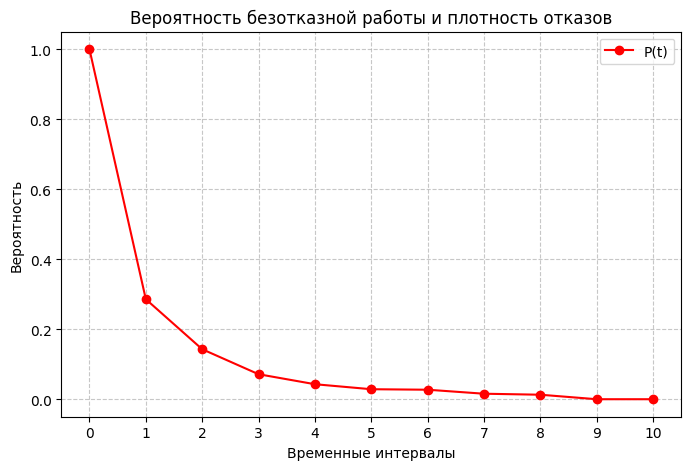

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Clients DOS by time intervals
n = np.array([500, 100, 50, 20, 10, 1, 8, 2, 9, 0])

# Total clients
N = np.sum(n)
display(f"Общее число абонентов: {N}")

# Cumulative distribution function
F_t = np.cumsum(n) / N

# Failure-free probs array = 1 - failure probs
P_t = 1 - F_t

# Arrays with 0-interval for display
ivals_for_display = np.arange(0, len(n) + 1)
P_t_for_display = np.insert(P_t, 0, 1)

distr_table_for_P = pd.DataFrame({
    "Временный интервалы (t)": ivals_for_display,
    "Кол-во потерь (n)": np.insert(n, 0, 0),
    "P(t)": P_t_for_display,
})
display(distr_table_for_P.style.hide(axis="index"))

plt.figure(figsize=(8, 5))
plt.plot(ivals_for_display, P_t_for_display, marker="o", color='red', label="P(t)")
plt.title("Вероятность безотказной работы и плотность отказов")
plt.xlabel("Временные интервалы")
plt.ylabel("Вероятность")
plt.xticks(ivals_for_display)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

Mean Time To Failure, MTTF

Средняя наработка до отказа (среднее время безотказной работы)

Среднее время до отказа: 11.271428571428572 минут


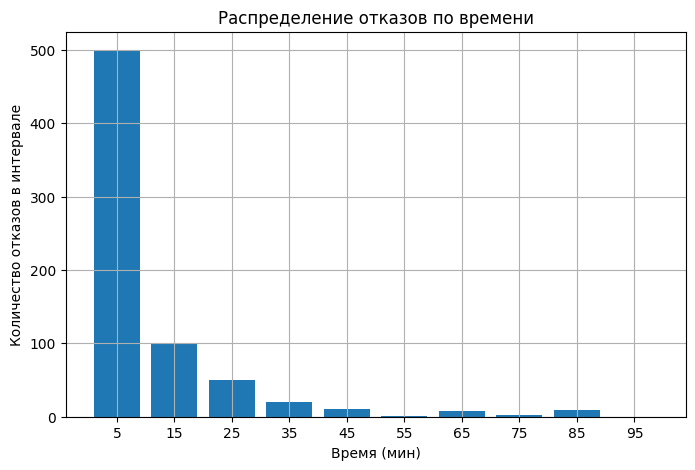

In [4]:
dt= 10

# Assemble an array of middle work-time ivals
middle_t = (np.arange(len(n)) + 0.5) * dt

# Get total operational time
total_operational_time = np.sum(n * middle_t)

# Calculate MTTF
mttf = total_operational_time / N

print(f"Среднее время до отказа: {mttf} минут")

plt.figure(figsize=(8, 5))
plt.bar(middle_t, n, width=8)
plt.title("Распределение отказов по времени")
plt.xlabel("Время (мин)")
plt.ylabel("Количество отказов в интервале")
plt.grid(True)
plt.xticks(middle_t)
plt.show()

Среднее квадратическое отклонение и дисперсия времени безотказной работы

Дисперсия = 193.09775510204082
Станд. отклонение = 13.895961827165502


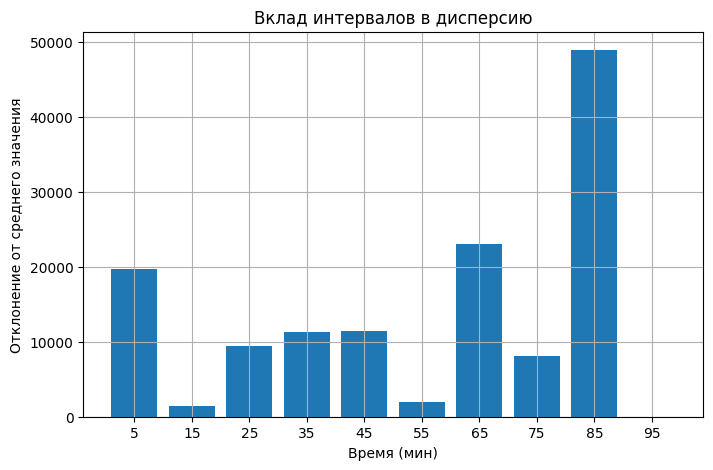

In [5]:
squared_deviations = n * (middle_t - mttf) ** 2
variance = np.sum(squared_deviations) / N
print("Дисперсия =", variance)

std_dev = np.sqrt(variance)
print("Станд. отклонение =", std_dev)


plt.figure(figsize=(8, 5))
plt.bar(middle_t, squared_deviations, width=8)
plt.title("Вклад интервалов в дисперсию")
plt.xlabel("Время (мин)")
plt.ylabel("Отклонение от среднего значения")
plt.grid(True)
plt.xticks(middle_t)
plt.show()

Плотность распределения времени до отказа

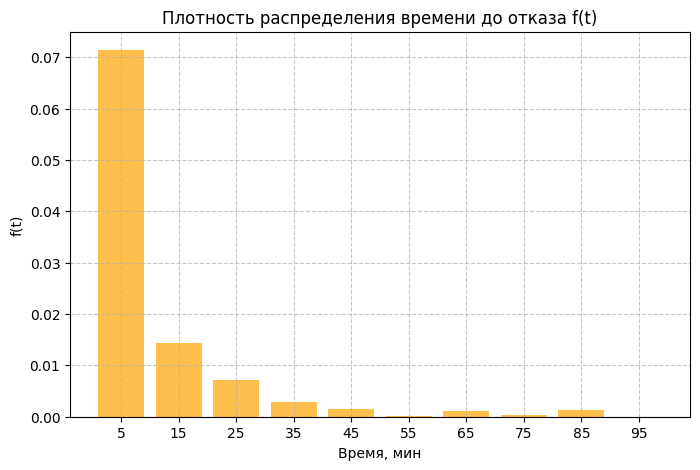

In [6]:
f_t = n / (N * dt)

pd.DataFrame({"interval": np.arange(1, len(n) + 1), "n_i": n, "f(t)": f_t})

plt.figure(figsize=(8, 5))
plt.bar(middle_t, f_t, width=dt * 0.8, color="orange", alpha=0.7)
plt.title("Плотность распределения времени до отказа f(t)")
plt.xlabel("Время, мин")
plt.ylabel("f(t)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(middle_t)
plt.show()

Интенсивность отказов

Интенсивность отказов λ(t) — только при P(t)>0:
[0.25       0.1        0.1        0.06666667 0.05       0.00526316
 0.07272727 0.02222222 0.         0.        ]


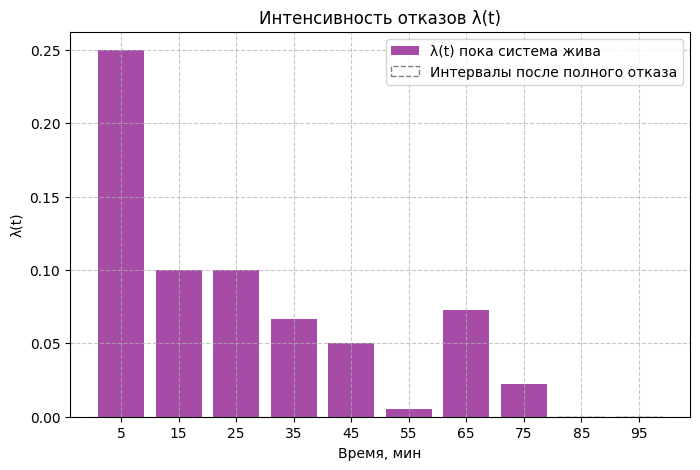

In [ ]:
# --- Интенсивность отказов λ(t) только пока система жива ---

# survival array without zero inserted
P_surv = 1 - np.cumsum(n) / N

# Фильтр интервалов, где P(t) > 0 (живые остались)
alive_mask = P_surv > 0

# λ(t) только там, где есть живые
lambda_t = np.zeros_like(P_surv, dtype=float)
lambda_t[alive_mask] = (n[alive_mask] / (N * dt)) / P_surv[alive_mask]

print("Интенсивность отказов λ(t) — только при P(t)>0:")
print(lambda_t)

plt.figure(figsize=(8, 5))
plt.bar(middle_t[alive_mask],
        lambda_t[alive_mask],
        width=dt * 0.8,
        color="purple",
        alpha=0.7,
        label="λ(t) пока система жива")

plt.bar(middle_t[~alive_mask],
        [0] * sum(~alive_mask),
        width=dt * 0.8,
        edgecolor="gray",
        facecolor="none",
        linestyle="--",
        label="Интервалы после полного отказа")

plt.title("Интенсивность отказов λ(t)")
plt.xlabel("Время, мин")
plt.ylabel("λ(t)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(middle_t)
plt.legend()
plt.show()

